# Indicadores técnicos
* Indicadores de momento: intentan capturar la tasa de cambio -> Relative strenght index (RSI), Stochastic Oscillator (SO)
* Indicadores de tendencia: capturan la dirección -> Mean Average (MA), Exponential Mean Average (EMA), Moving Average Convergence/divergence (MACD)
* Indicadores de volumen: capturan informacion acerca del volumen de transacción -> Positive indicator volume (IPVI), Indicator Negative Volume (INVI), Williams Overbought/Oversold Index, Volatility Volume Ratio (VVR), and Volume Ratio (VR)
* Indicadores de volatilidad: capturan la variación del precio -> Average True Range (ATR), Bollinguer bands

In [48]:
import pandas as pd
import gymnasium as gym
import pandas_ta as ta

import numpy as np
from sklearn.preprocessing import scale

import sys
import os

import matplotlib.pyplot as plt

# Añadir el directorio raíz del proyecto al PYTHONPATH
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(project_root)

In [30]:
data = pd.read_parquet(r'C:\Users\adelapuente\Desktop\rf_tfm\data\BTC_1min_2018-01-01_to_2023-12-31.parquet')

data

,date,open,low,high,close,volume
0,2018-01-01 00:00:00,13584.00,13541.93,13765.00,13541.93,558350.459454
1,2018-01-01 00:01:00,13607.14,13517.20,13658.75,13565.23,361676.256267
2,2018-01-01 00:02:00,13565.23,13534.49,13765.00,13587.30,387113.155403
3,2018-01-01 00:03:00,13563.00,13527.76,13765.00,13550.34,556212.790172
4,2018-01-01 00:04:00,13552.00,13531.02,13887.90,13560.14,345138.597671
...,...,...,...,...,...,...
3157219,2023-12-31 23:55:00,42357.80,42343.92,42360.90,42347.80,117733.622382
3157220,2023-12-31 23:56:00,42344.96,42344.81,42356.80,42353.22,52760.994823
3157221,2023-12-31 23:57:00,42357.30,42353.21,42364.74,42358.30,180240.410251
3157222,2023-12-31 23:58:00,42358.30,42357.30,42419.00,42393.46,319795.777720


In [31]:
# Calcular RSI
data['RSI'] = ta.rsi(data['close'], length=14)

# Calcular Stochastic Oscillator
data[['STOCH_K', 'STOCH_D']] = ta.stoch(data['high'], data['low'], data['close'], k=14, d=3)

# Calcular Moving Average
data['MA'] = ta.sma(data['close'], length=20)

# Calcular Exponential Moving Average
data['EMA'] = ta.ema(data['close'], length=20)

# Calcular MACD
data[['MACD', 'MACD_H', 'MACD_S']] = ta.macd(data['close'], fast=12, slow=26, signal=9)

# Calcular Positive Volume Index
data['PVI'] = ta.pvi(data['close'], data['volume'])

# Calcular Negative Volume Index
data['NVI'] = ta.nvi(data['close'], data['volume'])

# Calcular Average True Range
data['ATR'] = ta.atr(data['high'], data['low'], data['close'], length=14)

# Calcular Bollinger Bands
bb_df = ta.bbands(data['close'], length=20, std=2)
data = pd.concat([data, bb_df], axis=1)

data.dropna(inplace=True)

In [38]:
data.head()

,date,open,low,high,close,feature_volume,feature_RSI,feature_STOCH_K,feature_STOCH_D,feature_MA,...,feature_MACD_H,feature_MACD_S,feature_PVI,feature_NVI,feature_ATR,feature_BBL_20_2.0,feature_BBM_20_2.0,feature_BBU_20_2.0,feature_BBB_20_2.0,feature_BBP_20_2.0
33,2018-01-01 00:33:00,13526.00,13520.37,13757.5,13526.02,-0.197693,-0.240551,-1.282920,-0.952387,-0.510512,...,-0.009821,0.098758,-2.785687,2.629813,2.942274,-0.515666,-0.510512,-0.505367,0.713795,-0.349021
34,2018-01-01 00:34:00,13550.00,13508.00,13758.5,13528.00,-0.139032,-0.221808,-1.310702,-1.297663,-0.510552,...,-0.196261,0.082286,-2.785682,2.629813,2.919313,-0.515728,-0.510552,-0.505383,0.717718,-0.317653
35,2018-01-01 00:35:00,13549.99,13490.00,13755.3,13497.00,-0.099308,-0.499793,-1.460027,-1.407354,-0.510529,...,-0.509617,0.039515,-2.785754,2.629813,2.914814,-0.515667,-0.510529,-0.505400,0.711245,-0.686743
36,2018-01-01 00:36:00,13498.00,13483.05,13755.2,13509.38,-0.235797,-0.367987,-1.517030,-1.488633,-0.510469,...,-0.598776,-0.010739,-2.785754,2.629869,2.918300,-0.515507,-0.510469,-0.505438,0.694929,-0.559306
37,2018-01-01 00:37:00,13490.00,13487.00,13751.1,13529.90,-0.179614,-0.146173,-1.509082,-1.557507,-0.510659,...,-0.487678,-0.051669,-2.785707,2.629869,2.912600,-0.515666,-0.510659,-0.505659,0.689984,-0.280792


In [51]:
data.describe()

,date,open,low,high,close,feature_volume,feature_RSI,feature_STOCH_K,feature_STOCH_D,feature_MA,...,feature_MACD_H,feature_MACD_S,feature_PVI,feature_NVI,feature_ATR,feature_BBL_20_2.0,feature_BBM_20_2.0,feature_BBU_20_2.0,feature_BBB_20_2.0,feature_BBP_20_2.0
count,3151431,3.151431e+06,3.151431e+06,3.151431e+06,3.151431e+06,3.151431e+06,3.151431e+06,3.151431e+06,3.151431e+06,3.151431e+06,...,3.151431e+06,3.151431e+06,3.151431e+06,3.151431e+06,3.151431e+06,3.151431e+06,3.151431e+06,3.151431e+06,3.151431e+06,3.151431e+06
mean,2020-12-30 19:33:39.901700096,2.173091e+04,2.170331e+04,2.177089e+04,2.173036e+04,-1.547603e-16,5.220726e-16,-7.657931e-16,-1.193494e-15,3.500686e-16,...,5.486450e-18,-2.904011e-18,-1.028850e-15,2.927820e-16,1.178920e-16,-1.097247e-15,3.500686e-16,4.403996e-16,1.034766e-15,-9.891675e-17
min,2018-01-01 00:33:00,3.129520e+03,3.120000e+03,3.189710e+03,3.130000e+03,-3.070567e-01,-5.517034e+00,-1.834419e+00,-1.910632e+00,-1.160621e+00,...,-4.756149e+01,-4.109424e+01,-2.788962e+00,-8.930264e-01,-9.379658e-01,-1.163141e+00,-1.160621e+00,-1.162178e+00,-7.115242e-01,-3.550434e+00
25%,2019-07-02 05:30:30,8.302290e+03,8.282605e+03,8.348800e+03,8.306820e+03,-2.661200e-01,-5.280347e-01,-8.215022e-01,-8.264774e-01,-8.383673e-01,...,-2.486531e-01,-1.924089e-01,3.592295e-01,-7.064445e-01,-6.069443e-01,-8.386483e-01,-8.383673e-01,-8.380557e-01,-5.130367e-01,-7.041934e-01
50%,2020-12-30 09:28:00,1.692213e+04,1.691250e+04,1.694020e+04,1.692231e+04,-1.927830e-01,-7.735518e-02,-7.908637e-02,-7.728554e-02,-3.002712e-01,...,-8.160827e-03,-6.438171e-04,3.926064e-01,-2.444559e-01,-3.416079e-01,-2.981962e-01,-3.002712e-01,-3.030281e-01,-3.632370e-01,-9.733920e-02
75%,2022-06-30 14:25:30,3.210640e+04,3.206029e+04,3.215267e+04,3.210655e+04,-4.953197e-03,5.801211e-01,8.073805e-01,7.984448e-01,6.476902e-01,...,2.382415e-01,2.025655e-01,5.574629e-01,-1.665332e-01,2.336702e-01,6.440957e-01,6.476902e-01,6.506404e-01,-1.349746e-02,7.516113e-01
max,2023-12-31 23:59:00,6.898817e+04,6.873400e+04,6.900000e+04,6.899776e+04,3.998577e+02,5.428344e+00,2.253950e+00,2.347595e+00,2.927152e+00,...,4.424641e+01,2.903446e+01,6.352477e-01,2.637461e+00,3.540557e+01,2.933231e+00,2.927152e+00,2.940066e+00,2.940224e+01,3.541089e+00
std,NaN,1.601248e+04,1.600431e+04,1.600967e+04,1.601314e+04,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [54]:
data.columns

Index(['date', 'open', 'low', 'high', 'close', 'feature_volume', 'feature_RSI',
       'feature_STOCH_K', 'feature_STOCH_D', 'feature_MA', 'feature_EMA',
       'feature_MACD', 'feature_MACD_H', 'feature_MACD_S', 'feature_PVI',
       'feature_NVI', 'feature_ATR', 'feature_BBL_20_2.0',
       'feature_BBM_20_2.0', 'feature_BBU_20_2.0', 'feature_BBB_20_2.0',
       'feature_BBP_20_2.0'],
      dtype='object')

In [32]:
# Renombrar las columnas adecuadas con el prefijo "feature_"
# esto es necesario porque son las que va a devolver el entorno como observaciones
columns_to_rename = [col for col in data.columns if col not in ['date', 'open', 'close', 'high', 'low']]
data.rename(columns={col: 'feature_' + col for col in columns_to_rename}, inplace=True)

In [33]:
# Normalizar las columnas con el prefijo "feature_" usando scale
for col in data.columns:
    if col.startswith('feature_'):
        data[col] = scale(data[col])

In [34]:
data.dropna(inplace=True)

In [35]:
# # Registro del entorno personalizado
# gym.envs.registration.register(
#     id='TradingEnv-v0',
#     entry_point='my_envII.trading_env2_alex:TradingEnv',
# )

# Ahora intenta crear el entorno
env = gym.make(
    "TradingEnv-v0",
    name="BTCUSD",
    df=data,
    windows=5,
    positions=[-1, 0, 1],  # -1 (=SHORT), +1 (=LONG)
    initial_position=0,  # Posición inicial
    trading_fees=0.01 / 100,  # 0.01% por compra/venta de acciones
    portfolio_initial_value=10000,  # en FIAT (aquí, USD)
    max_episode_duration=500000,
)

In [36]:
observation, info = env.reset()

In [37]:
observation

array([[-0.21208736,  0.6848613 ,  0.3830476 ,  0.59981173, -0.8847313 ,
        -0.8846012 ,  0.08004049,  0.07941429,  0.05883239,  0.6300152 ,
        -0.83340365, -0.78880954, -0.8828222 , -0.8847313 , -0.88661015,
        -0.45373544,  0.92838144,  0.        ,  0.        ],
       [-0.295234  ,  0.16338143,  0.12440901,  0.31318456, -0.88469607,
        -0.8845951 ,  0.07201475,  0.04310315,  0.06245007,  0.6300152 ,
        -0.83344287, -0.787294  , -0.8827585 , -0.88469607, -0.88660336,
        -0.46211106,  0.30385482,  0.        ,  0.        ],
       [-0.10544909, -1.0533586 , -0.2936698 ,  0.07422362, -0.88470644,
        -0.8846765 ,  0.02701852, -0.0800473 ,  0.05573194,  0.6299545 ,
        -0.83344287, -0.78176963, -0.8827999 , -0.88470644, -0.88658285,
        -0.45299923, -1.3763747 ,  0.        ,  0.        ],
       [-0.10619434, -0.09370951, -0.65015507, -0.28448597, -0.88468   ,
        -0.8846854 ,  0.01963057, -0.08284274,  0.0487792 ,  0.6299545 ,
        -0.833

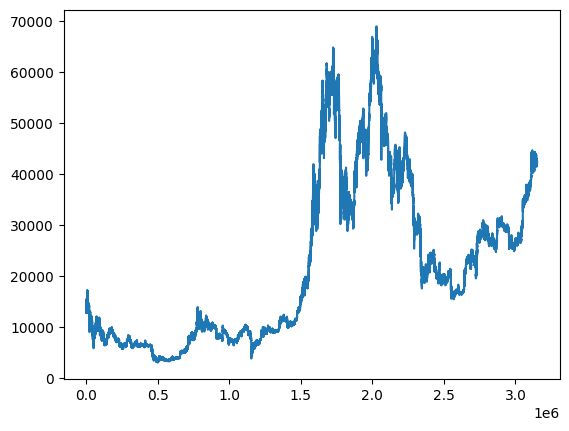

In [49]:
plt.plot(env.unwrapped._price_array)

In [58]:
env.unwrapped._features_columns

['feature_volume',
 'feature_RSI',
 'feature_STOCH_K',
 'feature_STOCH_D',
 'feature_MA',
 'feature_EMA',
 'feature_MACD',
 'feature_MACD_H',
 'feature_MACD_S',
 'feature_PVI',
 'feature_NVI',
 'feature_ATR',
 'feature_BBL_20_2.0',
 'feature_BBM_20_2.0',
 'feature_BBU_20_2.0',
 'feature_BBB_20_2.0',
 'feature_BBP_20_2.0',
 'dynamic_feature__0',
 'dynamic_feature__1']

In [57]:
len(env.unwrapped._features_columns), observation.shape

(19, (5, 19))

In [ ]:
env.unwrapped.dynamic_feature_functions

In [42]:
for _ in range(1000):
    action = env.action_space.sample()  # agent policy that uses the observation and info
    observation, reward, terminated, truncated, info = env.step(action)

    if terminated or truncated:
        observation, info = env.reset()

env.close()

In [44]:
observation

array([[-0.14876176, -0.84349227,  0.2369964 ,  0.69551516, -0.8848091 ,
        -0.88485557,  0.11067235, -0.12090383,  0.15880032,  0.628959  ,
        -0.83150405, -0.732026  , -0.88287246, -0.8848091 , -0.88671535,
        -0.46182683, -1.4786527 , -1.        ,  0.        ],
       [-0.2770369 ,  0.30251783, -0.00513105,  0.42598104, -0.8847713 ,
        -0.88484055,  0.10418625, -0.11323247,  0.14929701,  0.628959  ,
        -0.8313908 , -0.72378415, -0.8827826 , -0.8847713 , -0.8867295 ,
        -0.47713688,  0.14962769, -1.        ,  0.        ],
       [-0.18018639, -0.47514448, -0.59322846, -0.1254582 , -0.8847727 ,
        -0.88489294,  0.06912633, -0.17982475,  0.13420473,  0.62891287,
        -0.8313908 , -0.72212386, -0.88278836, -0.8847727 , -0.8867266 ,
        -0.4758609 , -1.2557608 , -1.        ,  0.        ],
       [-0.28672135,  0.37815425, -0.01444451, -0.21275401, -0.88476616,
        -0.88486415,  0.07407118, -0.13127387,  0.12318724,  0.62891287,
        -0.831

In [45]:
reward, terminated, truncated, info

(-0.0001802792337394418,
 False,
 False,
 {'idx': 1217837,
  'step': 1000,
  'date': 1217870,
  'position_index': 2,
  'position': 1,
  'real_position': 0.7591346587121381,
  'data_close': 7564.32,
  'data_low': 7548.5,
  'data_open': 7551.84,
  'data_date': Timestamp('2020-04-25 20:50:00'),
  'data_high': 7568.0,
  'portfolio_valuation': 9964.398164658649,
  'portfolio_distribution_asset': 1,
  'portfolio_distribution_cash': 2400.0781646586493,
  'reward': -0.0001802792337394418,
  'strategy_returns': -7.591021676014221e-05})

In [61]:
data.to_parquet(r'..\data\PROCESSED_BTC_1min_2018-01-01_to_2023-12-31.parquet')